In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from keras.utils import to_categorical
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import PIL.Image
import skimage
import tensorflow as tf
import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

c:\users\shantanu\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [52]:
#load data
df=pd.read_excel('train_image_paths.xlsx',sheetname="train_image_paths")
data=df['X'].tolist()
label=df['Y'].tolist()
X_train=[]
Y_train=[]
for i in range(0,3000):#preprocessing and load
    x=PIL.Image.open(data[i]).convert('LA')
    x=x.resize((227,227),PIL.Image.ANTIALIAS)
    a=np.array(x)
   # plt.imshow(a/255)#random train data mura dataset
    X_train.append(a)
    Y_train.append(label[i])
X_train=np.array(X_train)
Y_train=np.array(Y_train)


In [53]:
def mModel(input_shape):#Alex net architecture 
    X_input = Input(input_shape)
    # CONv1
    X = ZeroPadding2D((5, 5))(X_input)
    X = Conv2D(9, (11, 11), strides = (4, 4), name = 'conv0')(X)
    X = BatchNormalization(axis = 1, name = 'bn0')(X)
    X = Activation('relu')(X)
    # MAXPOOL1
    X = MaxPooling2D((2, 2),strides=(2,2),name='max_pool')(X)
    #Conv layer 2
    X = Conv2D(25, (5, 5), strides = (2, 2), name = 'conv1')(X)
    X = BatchNormalization(axis = 1, name = 'bn1')(X)
    X = Activation('relu')(X)
    #MAX pool2
    X = MaxPooling2D((2, 2),strides=(2,2),name='max_pool1')(X)
    #Conv layer 3
    X = Conv2D(256, (3, 3), strides = (2, 2), name = 'conv2')(X)
    X = BatchNormalization(axis = 1, name = 'bn2')(X)
    X = Activation('relu')(X)
    #MAX pool3
    X = MaxPooling2D((2, 2),strides=(2,2),name='max_pool2')(X)
    # FLATTEN=FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
    model = Model(inputs = X_input, outputs = X, name='mModel')
    return model

In [54]:
MModel = mModel(X_train.shape[1:])

In [55]:
MModel.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [56]:
MModel.fit(x=X_train,y=Y_train,epochs=50,batch_size=50)

Epoch 1/50
3000/3000 [==============================] - 64s 21ms/step - loss: 0.6550 - acc: 0.6590
Epoch 2/50
3000/3000 [==============================] - 62s 21ms/step - loss: 0.6394 - acc: 0.6690
Epoch 3/50
3000/3000 [==============================] - 62s 21ms/step - loss: 0.6336 - acc: 0.6687
Epoch 4/50
3000/3000 [==============================] - 62s 21ms/step - loss: 0.6264 - acc: 0.6677
Epoch 5/50
3000/3000 [==============================] - 62s 21ms/step - loss: 0.6406 - acc: 0.6627
Epoch 6/50
3000/3000 [==============================] - 62s 21ms/step - loss: 0.6264 - acc: 0.6697
Epoch 7/50
3000/3000 [==============================] - 63s 21ms/step - loss: 0.6281 - acc: 0.6697
Epoch 8/50
3000/3000 [==============================] - 62s 21ms/step - loss: 0.6150 - acc: 0.6743
Epoch 9/50
3000/3000 [==============================] - 62s 21ms/step - loss: 0.6151 - acc: 0.6777
Epoch 10/50
3000/3000 [==============================] - 62s 21ms/step - loss: 0.6078 - acc: 0.6873
Epoch 11/

In [61]:
#test data
X_test=[]
Y_test=[]
for i in range(0,100):
    x=PIL.Image.open(data[i+20000]).convert('LA')
    x=x.resize((227,227),PIL.Image.ANTIALIAS)
    a=np.array(x)
    X_test.append(a)
    Y_test.append(label[i+10000])
X_test=np.array(X_test)
Y_test=np.array(Y_test)
    

In [62]:
preds = MModel.evaluate(x=X_test,y=Y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

100/100 [==============================] - 1s 12ms/step

Loss = 2.6560801124572753
Test Accuracy = 0.32


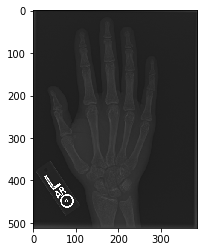

In [66]:
x=PIL.Image.open(data[15001]).convert('LA')
plt.imshow(x)
x=x.resize((227,227),PIL.Image.ANTIALIAS)
a=np.array(x)
